Copyright [yyyy] [name of copyright owner]

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import chi2


def backward_elimination(X, y, significance_level = 0.05):
    features = X.columns.tolist()
    selected_features = []
    while len(features) > 0:
        features_with_constant = sm.add_constant(X[features])
        model = sm.Logit(y, features_with_constant).fit(disp=0 , maxiter=10000)
        p_values = model.pvalues[1:]  
        max_p_value = p_values.max()  
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            selected_features = features
            break
    return model, features_with_constant, selected_features

data_path = 'high_diamond_ranked_10min.csv'
data = pd.read_csv(data_path)

data = data.drop(columns=['gameId'])
X = data.drop(columns=['blueWins', 'redExperienceDiff', 'redGoldDiff', 'redFirstBlood', 'redKills', 'redDeaths', 'blueCSPerMin', 'redCSPerMin', 'blueGoldPerMin', 'redGoldPerMin'])
y = data['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


features_with_constant = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["feature"] = features_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(features_with_constant.values, i) for i in range(len(features_with_constant.columns))]
vif_data

C:\Users\tamgo\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,2585.992641
1,blueWardsPlaced,1.028897
2,blueWardsDestroyed,1.068453
3,blueFirstBlood,1.268042
4,blueKills,14.426536
5,blueDeaths,13.731422
6,blueAssists,3.811653
7,blueEliteMonsters,inf
8,blueDragons,inf
9,blueHeralds,inf


       blueWardsPlaced  blueWardsDestroyed  blueFirstBlood    blueKills  \
count      9879.000000         9879.000000     9879.000000  9879.000000   
mean         22.288288            2.824881        0.504808     6.183925   
std          18.019177            2.174998        0.500002     3.011028   
min           5.000000            0.000000        0.000000     0.000000   
25%          14.000000            1.000000        0.000000     4.000000   
50%          16.000000            3.000000        1.000000     6.000000   
75%          20.000000            4.000000        1.000000     8.000000   
max         250.000000           27.000000        1.000000    22.000000   

        blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
count  9879.000000  9879.000000        9879.000000  9879.000000  9879.000000   
mean      6.137666     6.645106           0.549954     0.361980     0.187974   
std       2.933818     4.064520           0.625527     0.480597     0.390712   
min 

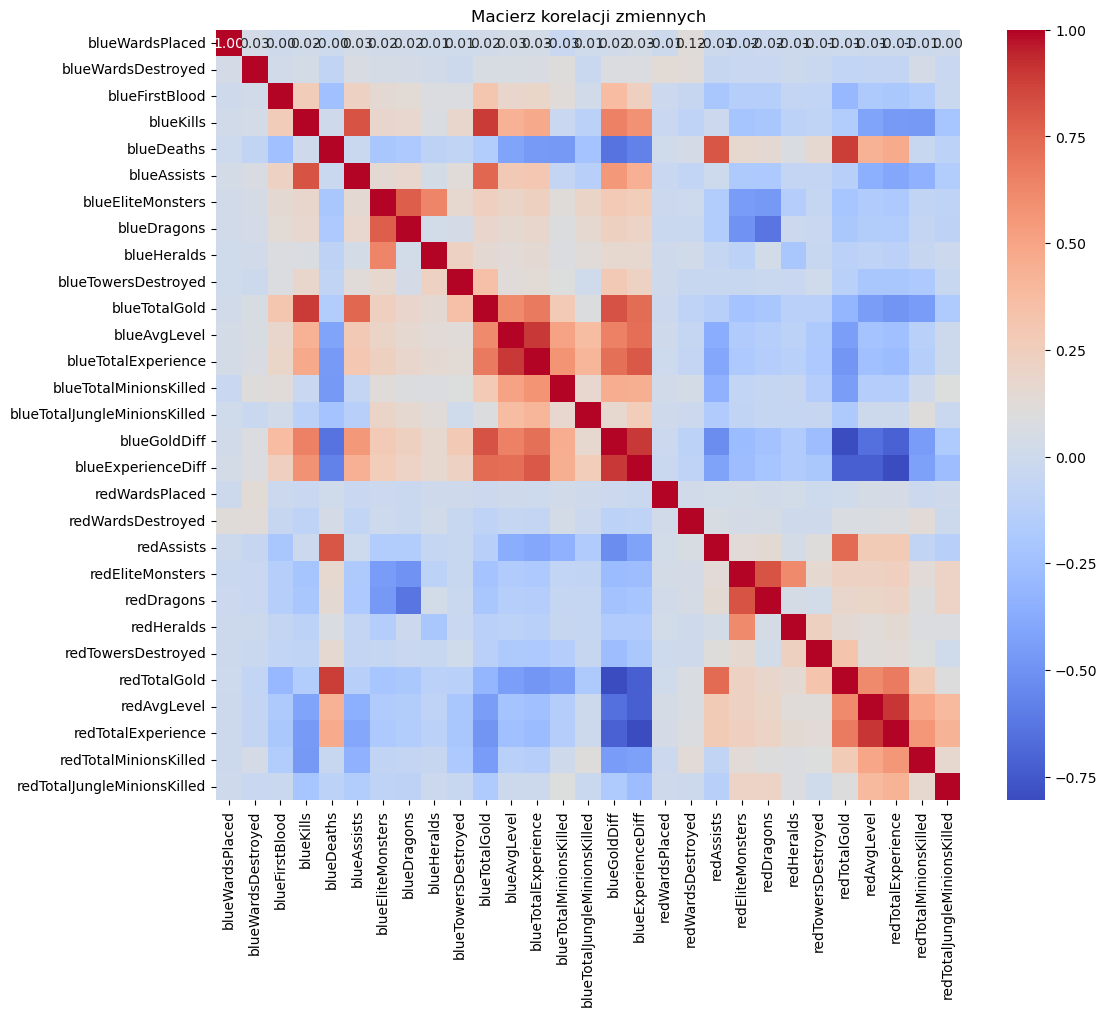

In [3]:
# Obliczanie podstawowych statystyk opisowych
pd.set_option('display.max_columns', None)
desc_stats = X.describe()
print(desc_stats)

# Obliczanie macierzy korelacji
correlation_matrix = X.corr()

# Wizualizacja macierzy korelacji za pomocą heatmapy
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Macierz korelacji zmiennych')
plt.show()



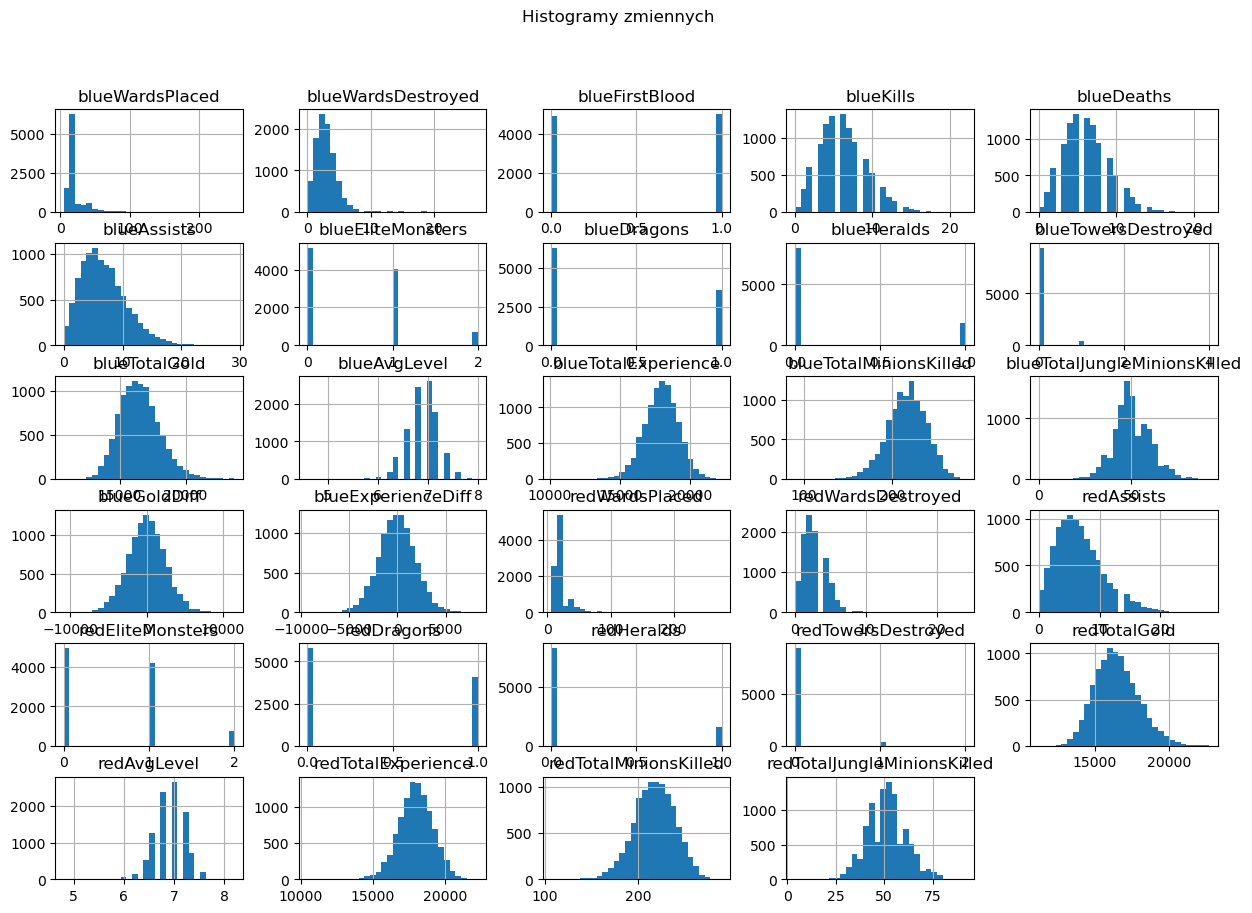

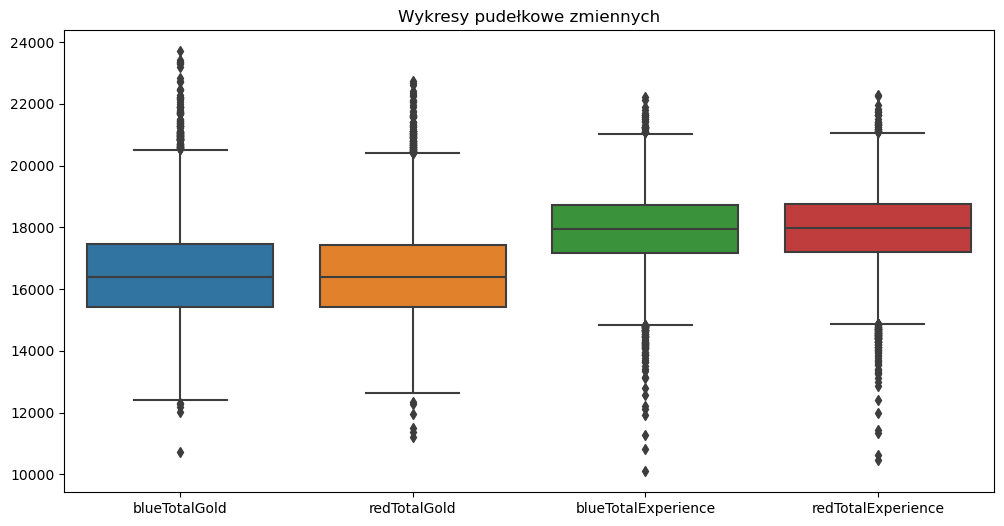

Liczba wartości odstających w każdej zmiennej:
blueWardsPlaced                 1627
blueWardsDestroyed               136
blueFirstBlood                     0
blueKills                         88
blueDeaths                        65
blueAssists                      209
blueEliteMonsters                  0
blueDragons                        0
blueHeralds                     1857
blueTowersDestroyed              464
blueTotalGold                    114
blueAvgLevel                      69
blueTotalExperience              107
blueTotalMinionsKilled            61
blueTotalJungleMinionsKilled     164
blueGoldDiff                     127
blueExperienceDiff               126
redWardsPlaced                  1667
redWardsDestroyed                136
redAssists                       205
redEliteMonsters                   0
redDragons                         0
redHeralds                      1581
redTowersDestroyed               396
redTotalGold                      99
redAvgLevel                 

In [4]:
# Histogramy dla wybranych zmiennych
X.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogramy zmiennych')
plt.show()

# Wykresy pudełkowe dla wybranych zmiennych
plt.figure(figsize=(12, 6))
sns.boxplot(data=X[['blueTotalGold', 'redTotalGold', 'blueTotalExperience', 'redTotalExperience']])
plt.title('Wykresy pudełkowe zmiennych')
plt.show()

# Identyfikacja wartości odstających za pomocą IQR (interquartile range)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Filtracja wartości odstających
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).sum()
print(f'Liczba wartości odstających w każdej zmiennej:\n{outliers}')

In [5]:
model, features_after_be, selected_features = backward_elimination(X_train, y_train)
X_test_selected = X_test[selected_features]

In [6]:
correlation_matrix = features_after_be.corr()
correlation_matrix
#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
#plt.title('Macierz korelacji zmiennych')
#plt.show()

,const,blueDragons,blueTotalExperience,blueTotalJungleMinionsKilled,blueGoldDiff,redWardsPlaced,redEliteMonsters,redTowersDestroyed,redTotalExperience
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blueDragons,NaN,1.000000,0.176317,0.157659,0.235800,-0.025496,-0.502698,-0.034702,-0.159780
blueTotalExperience,NaN,0.176317,1.000000,0.415305,0.717822,-0.007209,-0.185027,-0.200418,-0.281087
blueTotalJungleMinionsKilled,NaN,0.157659,0.415305,1.000000,0.169614,0.003614,-0.070131,-0.057174,-0.015945
blueGoldDiff,NaN,0.235800,0.717822,0.169614,1.000000,-0.016699,-0.285630,-0.281409,-0.712602
redWardsPlaced,NaN,-0.025496,-0.007209,0.003614,-0.016699,1.000000,0.029759,-0.009149,0.032872
redEliteMonsters,NaN,-0.502698,-0.185027,-0.070131,-0.285630,0.029759,1.000000,0.167885,0.252308
redTowersDestroyed,NaN,-0.034702,-0.200418,-0.057174,-0.281409,-0.009149,0.167885,1.000000,0.126835
redTotalExperience,NaN,-0.159780,-0.281087,-0.015945,-0.712602,0.032872,0.252308,0.126835,1.000000


Statystyka chi-kwadrat: 2578.3266524376995
Liczba stopni swobody: 8.0
pvalue: 0.0
Odds Ratios:
                              Odds Ratio
const                           1.021373
blueDragons                     1.391716
blueTotalExperience             1.000188
blueTotalJungleMinionsKilled    1.009013
blueGoldDiff                    1.000425
redWardsPlaced                  0.996903
redEliteMonsters                0.831536
redTowersDestroyed              1.409782
redTotalExperience              0.999787

                           Logit Regression Results                           
Dep. Variable:               blueWins   No. Observations:                 7903
Model:                          Logit   Df Residuals:                     7894
Method:                           MLE   Df Model:                            8
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.2353
Time:                        13:19:30   Log-Likelihood:                -4188.7
converged:          

C:\Users\tamgo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


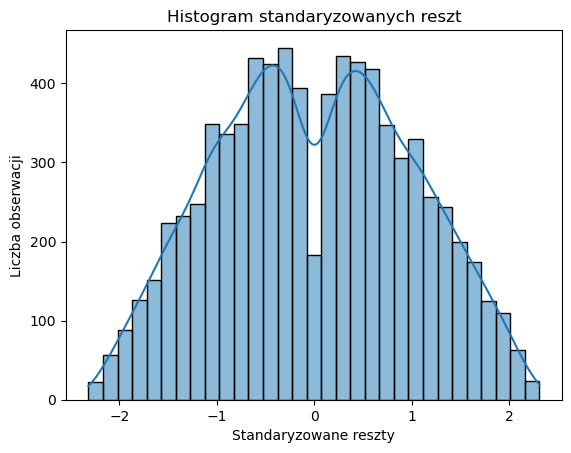

Accuracy (Dokładność) dla modelu bez usuwania outlierów: 0.7332995951417004
ROC AUC dla modelu bez usuwania outlierów: 0.8172313006918214

Classification report (Raport klasyfikacji) dla modelu bez usuwania outlierów:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       983
           1       0.73      0.74      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976


Średnia reszt: -1.2047668808282098e-16
Odchylenie standardowe reszt: 1.000063273118478
Skośność reszt: 0.01987517896289257
Kurtoza reszt: -0.8001662535664034
Mediana reszt: -0.013284887439520322
AIC: 8395.451269357995

Statystyka testu Andersona-Darlinga: 24.42380837350356
15.0%: 0.576, dane nie wydają się być normalne (można odrzucić H0)
10.0%: 0.656, dane nie wydają się być normalne (można odrzucić H0)
5.0%: 0.787, dane nie wydają się być normalne 

,Odds Ratio,2.5%,97.5%
const,1.021373,0.265385,3.930899
blueDragons,1.391716,1.225714,1.580202
blueTotalExperience,1.000188,1.000110,1.000267
blueTotalJungleMinionsKilled,1.009013,1.003019,1.015042
blueGoldDiff,1.000425,1.000373,1.000477
redWardsPlaced,0.996903,0.994090,0.999725
redEliteMonsters,0.831536,0.752599,0.918752
redTowersDestroyed,1.409782,1.063405,1.868982
redTotalExperience,0.999787,0.999715,0.999860


In [7]:
nocleank_model = sm.Logit(y_train, features_after_be).fit(disp=0, maxiter=100, cov_type='HC3')

nocleank_params = nocleank_model.params
nocleank_odds_ratios = np.exp(nocleank_params)
nocleank_odds_ratios_df = pd.DataFrame(nocleank_odds_ratios, columns=['Odds Ratio'])

#Wyznaczenie statystyki chi-kwadrat
chi2_stat = nocleank_model.llr
df_model = nocleank_model.df_model

#Obliczenie p-value
p_value = chi2.sf(chi2_stat, df_model)

print(f'Statystyka chi-kwadrat: {chi2_stat}')
print(f'Liczba stopni swobody: {df_model}')
print(f'pvalue: {p_value}')

nocleank_params = nocleank_model.params
nocleank_odds_ratios = np.exp(nocleank_params)
nocleank_odds_ratios_df = pd.DataFrame(nocleank_odds_ratios, columns=['Odds Ratio'])
nocleank_summary = nocleank_model.summary()
nocleank_aic = nocleank_model.aic

conf = nocleank_model.conf_int()
conf['Odds Ratio'] = np.exp(nocleank_params)
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
conf['2.5%'] = np.exp(conf['2.5%'])
conf['97.5%'] = np.exp(conf['97.5%'])


y_pred_probs_nocleank = nocleank_model.predict(sm.add_constant(X_test_selected))
y_pred_nocleank = (y_pred_probs_nocleank >= 0.5).astype(int)
accuracy_nocleank = accuracy_score(y_test, y_pred_nocleank)
roc_auc_nocleank = roc_auc_score(y_test, y_pred_probs_nocleank)
report_nocleank = classification_report(y_test, y_pred_nocleank)

residuals_nocleank = nocleank_model.resid_response
std_residuals_nocleank = residuals_nocleank / np.std(residuals_nocleank)
mean_residuals_nocleank = np.mean(std_residuals_nocleank)
std_dev_residuals_nocleank = np.std(std_residuals_nocleank, ddof=1)
skewness_residuals_nocleank = np.mean(std_residuals_nocleank**3)
kurtosis_residuals_nocleank = np.mean(std_residuals_nocleank**4) - 3
median_residuals_nocleank = np.median(residuals_nocleank)

sns.histplot(std_residuals_nocleank, kde=True)
plt.title('Histogram standaryzowanych reszt')
plt.xlabel('Standaryzowane reszty')
plt.ylabel('Liczba obserwacji')



print(f'Odds Ratios:\n{nocleank_odds_ratios_df}\n')
print(nocleank_summary)
plt.show()
print(f'Accuracy (Dokładność) dla modelu bez usuwania outlierów: {accuracy_nocleank}')
print(f'ROC AUC dla modelu bez usuwania outlierów: {roc_auc_nocleank}\n')
print(f'Classification report (Raport klasyfikacji) dla modelu bez usuwania outlierów:\n{report_nocleank}\n')
print(f'Średnia reszt: {mean_residuals_nocleank}')
print(f'Odchylenie standardowe reszt: {std_dev_residuals_nocleank}')
print(f'Skośność reszt: {skewness_residuals_nocleank}')
print(f'Kurtoza reszt: {kurtosis_residuals_nocleank}')
print(f'Mediana reszt: {median_residuals_nocleank}')
print(f'AIC: {nocleank_aic}\n')

anderson_test_nocleank = stats.anderson(std_residuals_nocleank)
print(f"Statystyka testu Andersona-Darlinga: {anderson_test_nocleank.statistic}")

for i in range(len(anderson_test_nocleank.critical_values)):
    sl, cv = anderson_test_nocleank.significance_level[i], anderson_test_nocleank.critical_values[i]
    if anderson_test_nocleank.statistic < cv:
        print(f"{sl}%: {cv}, dane wydają się być normalne (nie można odrzucić H0)")
    else:
        print(f"{sl}%: {cv}, dane nie wydają się być normalne (można odrzucić H0)")

conf[['Odds Ratio', '2.5%', '97.5%']]

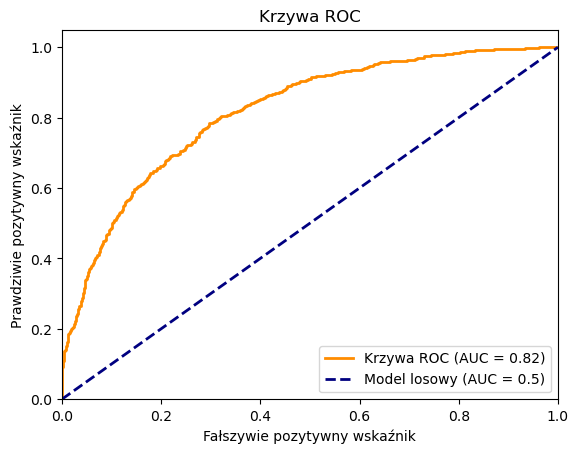

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_pred_probs_nocleank)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Krzywa ROC (AUC = {roc_auc_nocleank:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Model losowy (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Fałszywie pozytywny wskaźnik')
plt.ylabel('Prawdziwie pozytywny wskaźnik')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()